# Análisis Exploratorio de datos generados del Simulador de Trayectoria

# **Preparación del Notebook**



## Librerías e Importación de Base de Datos

**Cargamos todas las herramientas que utilizaremos a lo largo de nuestro proyecto**

In [1]:
#   Módulos utilizados en EDA:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns


import plotly.express as px
import plotly.figure_factory as ff    
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import contextily as ctx
import folium

plt.style.use('seaborn')

**Importación de Base de Datos**

La base de datos (BD) es producto de las simulaciones realizadas en ```/notebooks/1_Simulacion_Trayectoria.ipynb```.

Con respecto a la BD no es necesario relizar limpieza de la misma, ya es consumible directamente debido a que los datos estan estructurados y limpios. Por lo tanto, solo se trabaja sin más detalles.

In [2]:
# Cargamos las BD's a un DataFrame y leemos los datos de los archivos .csv
ascenso = pd.read_csv('../data/parameters_ascenso.csv', sep=',', header=0)
descenso = pd.read_csv('../data/parameters_descenso.csv', sep=',', header=0)


In [3]:
# Previsualización de los datos
ascenso.head()

tiempo   latitude  longitude     altitud  s_vertical  viento_u  viento_v  \
0       0  13.808825 -89.328988  504.000000    0.000000  0.038616  0.361045   
1       1  13.808822 -89.328988  505.013199    1.900485  0.038679  0.361301   
2       2  13.808819 -89.328988  507.464428    2.848253  0.038831  0.361920   
3       3  13.808815 -89.328988  510.499928    3.167923  0.039019  0.362688   
4       4  13.808812 -89.328988  513.721679    3.257069  0.039218  0.363502   

   temperatura       presion  densidad  gravedad  diameter_balloon  
0   284.874000  95415.967410  1.166879  9.805099          1.888820  
1   284.867414  95404.377955  1.166764  9.805095          1.888882  
2   284.851481  95376.344371  1.166487  9.805088          1.889032  
3   284.831750  95341.638055  1.166143  9.805079          1.889217  
4   284.810809  95304.813505  1.165778  9.805069          1.889414

In [4]:
# Previsualización de los datos
descenso.head()

tiempo   latitude  longitude       altitud  s_vertical   viento_u  \
0    6665  13.869864 -89.324389  29994.123257    6.531676 -29.220833   
1    6666  13.869831 -89.324386  29995.829323   -3.132332 -29.221158   
2    6667  13.869798 -89.324383  29987.940592  -12.547105 -29.219657   
3    6668  13.869766 -89.324379  29971.064557  -21.004724 -29.216446   
4    6669  13.869733 -89.324376  29946.395879  -28.060078 -29.211753   

   viento_v  temperatura      presion  densidad  gravedad  diameter_balloon  
0  3.672376   226.581123  1201.171960  0.018469  9.714960               0.0  
1  3.675286   226.582829  1200.866876  0.018464  9.714955               0.0  
2  3.661832   226.574941  1202.278233  0.018486  9.714979               0.0  
3  3.633050   226.558065  1205.303253  0.018534  9.715030               0.0  
4  3.590978   226.533396  1209.739265  0.018604  9.715105               0.0

# **Descripción de los Datos**

El globo-sonda a medida que asciende y desciende en la atmósfera, como se muestra en Fig. 1 genera un conjunto de información.

<figure style="text-align:center;">
    <img src = "/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/01_etapas de la mision.png"
        width="600" height="400"">
    <figcaption> Fig. 1 Fase de Vuelo.</figcaption>
</figure>

Los datos generados del simulador en ``` ./code/src/1_Simulacion_Trayectoria.ipynb ``` fueron:
 
1.	**Tiempo [s]:** unidad de sucesos donde la trayectoria de ascenso y descenso se describe. 
2.	**Latitud ($\phi$) [DD]:** coordenada geográfica sobre la posición norte-sur donde se ubica la sonda en la superficie de la tierra.
3.	**Longitud ($\lambda$) [DD]:** coordenada geográfica sobre la posición este-oeste donde se ubica la sonda en la superficie de la tierra. 
4.	**Altitud (z) [m]:** elevación vertical sobre la superficie de la tierra donde se ubica la sonda.
5.	**Velocidad vertical [m/s]** cambio de posición sobre la elevación vertical de la sonda por unidad de tiempo.
6.  **Velocidad U viento [m/s]:** componente de viento paralela a la longitud. Es positiva de oeste a este. 
7.	**Velocidad V viento [m/s]:** componente de viento paralela a la longitud. Es positiva de norte a sur.
8.	**Temperatura [K]:** temperatura atmosférica basada en la ISA a lo largo de su posición espacial y temporal en la trayectoria.
9.	**Presión [Pa]:** presión atmosférica basada en la ISA a lo largo de su posición espacial y temporal en la trayectoria.
10.	**Densidad [kg/m³]:** densidad atmosférica basada en la ISA a lo largo de su posición espacial y temporal en la trayectoria.
11.	**Gravedad [m/s²]:** variación de la intensidad del campo gravitatorio en función de la altitud en la trayectoria.
12. **Diametro del Globo [m]:** longitud transversal del globo. De valor cero en el descenso debido a su exposición.



Encuentras el Dataset en la siguiente ruta: ```../code/data/parameters_ascenso.csv ``` y también ```../code/data/parameters_descenso.csv ```, a continuacón se previsualiza los datos que contiene.


In [5]:
# Obtengamos la infomación general ascenso
ascenso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tiempo            6666 non-null   int64  
 1   latitude          6666 non-null   float64
 2   longitude         6666 non-null   float64
 3   altitud           6666 non-null   float64
 4   s_vertical        6666 non-null   float64
 5   viento_u          6666 non-null   float64
 6   viento_v          6666 non-null   float64
 7   temperatura       6666 non-null   float64
 8   presion           6666 non-null   float64
 9   densidad          6666 non-null   float64
 10  gravedad          6666 non-null   float64
 11  diameter_balloon  6666 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 625.1 KB


In [6]:
# Obtengamos la infomación general descenso
descenso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tiempo            2355 non-null   int64  
 1   latitude          2355 non-null   float64
 2   longitude         2355 non-null   float64
 3   altitud           2355 non-null   float64
 4   s_vertical        2355 non-null   float64
 5   viento_u          2355 non-null   float64
 6   viento_v          2355 non-null   float64
 7   temperatura       2355 non-null   float64
 8   presion           2355 non-null   float64
 9   densidad          2355 non-null   float64
 10  gravedad          2355 non-null   float64
 11  diameter_balloon  2355 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 220.9 KB


# **Análisis Descriptivo**

In [7]:
# Función para aproximar y convertir unidades
def conversion_unidades(columna):
    if columna.name == 'altitud':
        columna = columna/1000
        return columna
    elif columna.name == 'presion':
        columna = columna/100
        return columna
    elif columna.name == 'tiempo':
        columna = columna/60
        return columna
    elif columna.name == 'temperatura':
        columna = columna-273.15
        return columna   
    else:
        return columna


columns = ['\textbf{Tiempo [min]}', '\textbf{Latitud ($\phi$)}', '\textbf{Longitud ($\lambda$)}', '\textbf{Altitud (z) [km]}', '\textbf{Vel. Vertical [m/s]}', '\textbf{Viento U [m/s]}',
           '\textbf{Viento V [m/s]}', '\textbf{Temperatura [°C]}', '\textbf{Presión [hPa]}', '\textbf{Densidad [kg/m³]}', '\textbf{Gravedad [m/s²]}', '\textbf{Diámetro Globo [m]}']


In [8]:
descriptivo_ascenso = ascenso
descriptivo_ascenso  = descriptivo_ascenso.apply(conversion_unidades, axis=0)
descriptivo_ascenso = round(descriptivo_ascenso.describe(include=["float64", "int"]).drop('count'), 5)

descriptivo_ascenso.columns = columns

display(descriptivo_ascenso.T)

with open('/home/osmin-ubuntu/proyecto_stratoballoon/document/table/03_tabla_descriptivo_ascenso.tex', 'w') as f:
    f.write(
        descriptivo_ascenso.T
        .rename(columns={"mean": "\textbf{Media}", "std": "\textbf{Desviación típica}","min": "\textbf{Min}", "25%": "\textbf{25\%}", "50%": "\textbf{50\%}", "75%":"\textbf{75\%}", "max": "\textbf{Máx}" })
        .to_latex(
            index=True,
            bold_rows=True,
            column_format="c"*len(descriptivo_ascenso.columns),
            # longtable=True,
            escape=False,
            caption="Estadística descriptiva ascenso.",
            label="tab:desciptivo_ascenso",
        )
    )

mean        std       min       25%  \
\textbf{Tiempo [min]}           55.54167   32.07421   0.00000  27.77083   
\textbf{Latitud ($\phi$)}       13.85097    0.02472  13.80770  13.82157   
\textbf{Longitud ($\lambda$)}  -89.32764    0.00109 -89.32899 -89.32861   
\textbf{Altitud (z) [km]}       13.53558    8.36012   0.50400   6.25319   
\textbf{Vel. Vertical [m/s]}     4.41683    0.91557   0.00000   3.63057   
\textbf{Viento U [m/s]}         -6.43619    7.06341 -29.22083  -7.02784   
\textbf{Viento V [m/s]}         -0.90501    3.27907 -12.06565  -2.77407   
\textbf{Temperatura [°C]}      -39.86431   21.04598 -56.62071 -56.50000   
\textbf{Presión [hPa]}         278.83265  268.33053  12.01172  52.08537   
\textbf{Densidad [kg/m³]}        0.38779    0.33925   0.01847   0.08363   
\textbf{Gravedad [m/s²]}         9.76516    0.02556   9.71496   9.74420   
\textbf{Diámetro Globo [m]}      3.57101    1.52970   1.88882   2.30463   

                                     50%        75%        max  
\textbf{Tiempo [min]}           55.54167   83.31250  111.08333  
\textbf{Latitud ($\phi$)}       13.85663   13.87343   13.88286  
\textbf{Longitud ($\lambda$)}  -89.32774  -89.32714  -89.32439  
\textbf{Altitud (z) [km]}       12.71488   20.38154   29.99412  
\textbf{Vel. Vertical [m/s]}     4.16845    5.08576    6.53168  
\textbf{Viento U [m/s]}         -3.73740   -2.72217    0.12773  
\textbf{Viento V [m/s]}          0.03555    0.96788    4.51644  
\textbf{Temperatura [°C]}      -50.59204  -25.64574   11.72400  
\textbf{Presión [hPa]}         173.39945  456.37325  954.15967  
\textbf{Densidad [kg/m³]}        0.27883    0.64238    1.16688  
\textbf{Gravedad [m/s²]}         9.76762    9.78743    9.80510  
\textbf{Diámetro Globo [m]}      3.04381    4.54716    7.52292

/tmp/ipykernel_279/1706834338.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  descriptivo_ascenso.T


In [9]:
descriptivo_descenso = descenso
descriptivo_descenso  = descriptivo_descenso.apply(conversion_unidades, axis=0)
descriptivo_descenso = round(descriptivo_descenso.describe(include=["float64", "int"]).drop('count'), 5)

descriptivo_descenso.columns = columns

display(descriptivo_descenso.T)

with open('/home/osmin-ubuntu/proyecto_stratoballoon/document/table/03_tabla_descriptivo_descenso.tex', 'w') as f:
    f.write(
        descriptivo_descenso.T
        .rename(columns={"mean": "\textbf{Media}", "std": "\textbf{Desviación típica}","min": "\textbf{Min}", "25%": "\textbf{25\%}", "50%": "\textbf{50\%}", "75%":"\textbf{75\%}", "max": "\textbf{Máx}" })
        .to_latex(
            index=True,
            bold_rows=True,
            column_format="c"*len(descriptivo_descenso.columns),
            # longtable=True,
            escape=False,
            caption="Estadística descriptiva descenso.",
            label="tab:desciptivo_descenso",
        )
    )

mean        std        min        25%  \
\textbf{Tiempo [min]}          130.70000   11.33290  111.08333  120.89167   
\textbf{Latitud ($\phi$)}       13.87943    0.01062   13.86401   13.86943   
\textbf{Longitud ($\lambda$)}  -89.32359    0.00030  -89.32439  -89.32384   
\textbf{Altitud (z) [km]}       10.18119    7.68314    0.00246    3.78148   
\textbf{Vel. Vertical [m/s]}   -12.72221    8.57864  -45.78658  -14.85339   
\textbf{Viento U [m/s]}         -4.64714    5.30650  -29.22116   -4.96890   
\textbf{Viento V [m/s]}         -1.07031    3.27182  -12.06136   -2.78589   
\textbf{Temperatura [°C]}      -32.04419   24.41396  -56.61399  -56.50000   
\textbf{Presión [hPa]}         391.38992  299.08436   12.00867  116.98481   
\textbf{Densidad [kg/m³]}        0.53004    0.36444    0.01846    0.18812   
\textbf{Gravedad [m/s²]}         9.77542    0.02351    9.71496    9.75995   
\textbf{Diámetro Globo [m]}      0.00000    0.00000    0.00000    0.00000   

                                     50%        75%         max  
\textbf{Tiempo [min]}          130.70000  140.50833   150.31667  
\textbf{Latitud ($\phi$)}       13.87684   13.88892    13.89368  
\textbf{Longitud ($\lambda$)}  -89.32358  -89.32328   -89.32323  
\textbf{Altitud (z) [km]}        8.50208   15.22393    29.99583  
\textbf{Vel. Vertical [m/s]}    -9.17031   -7.06163     6.53168  
\textbf{Viento U [m/s]}         -3.33289   -2.16755     0.12705  
\textbf{Viento V [m/s]}         -0.09935    0.85241     4.51088  
\textbf{Temperatura [°C]}      -40.26352   -9.57964    14.98399  
\textbf{Presión [hPa]}         331.87727  634.51183  1012.95419  
\textbf{Densidad [kg/m³]}        0.49647    0.83869     1.22477  
\textbf{Gravedad [m/s²]}         9.78053    9.79502     9.80664  
\textbf{Diámetro Globo [m]}      0.00000    0.00000     0.00000

/tmp/ipykernel_279/1845681640.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  descriptivo_descenso.T


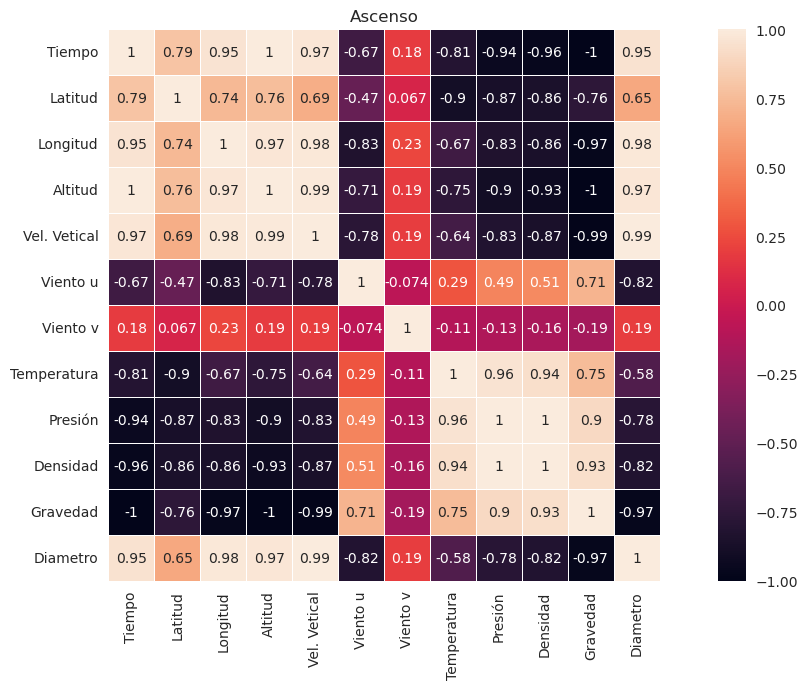

In [10]:
corr_matrix = ascenso.select_dtypes(
    include=['float64', 'int']).corr(method='pearson')
# corr_matrix.r
plt.figure(figsize=(12, 7))

sns.heatmap(corr_matrix,
            square=True,
            annot=True,
            xticklabels=['Tiempo', 'Latitud', 'Longitud', 'Altitud', 'Vel. Vetical', 'Viento u',
                         'Viento v', 'Temperatura', 'Presión', 'Densidad', 'Gravedad', 'Diametro'],
            yticklabels=['Tiempo', 'Latitud', 'Longitud', 'Altitud', 'Vel. Vetical', 'Viento u',
                         'Viento v', 'Temperatura', 'Presión', 'Densidad', 'Gravedad', 'Diametro'],
            vmin=-1.0, vmax=1.0,
            linewidths=.5)

plt.title('Ascenso')
plt.tight_layout()

plt.savefig(
    '/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/03_pearson_ascenso.png', dpi=300)
plt.show()


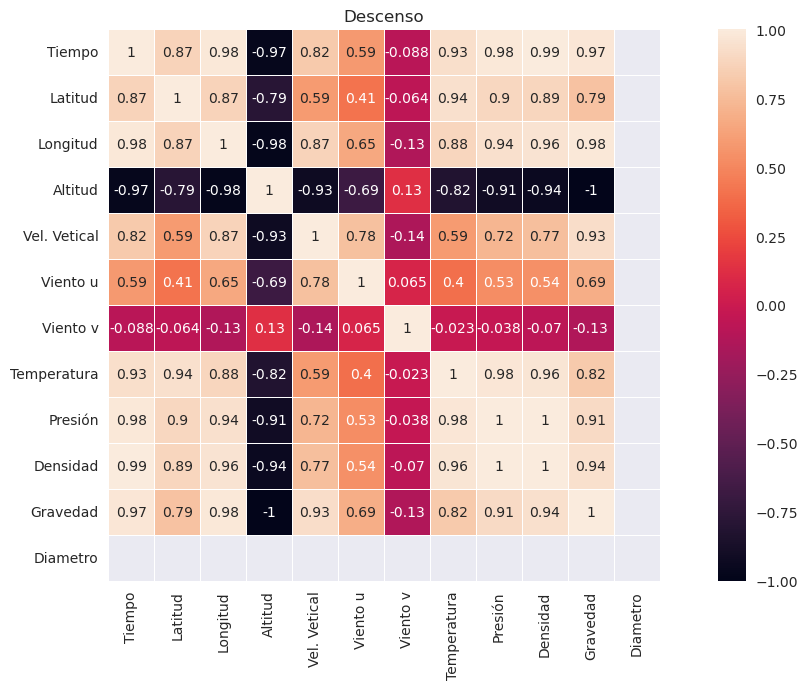

In [11]:
corr_matrix = descenso.select_dtypes(include=['float64', 'int']).corr(method='pearson')
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, 
            square=True,
            annot=True,
            xticklabels=['Tiempo', 'Latitud', 'Longitud', 'Altitud', 'Vel. Vetical', 'Viento u',
                         'Viento v', 'Temperatura', 'Presión', 'Densidad', 'Gravedad', 'Diametro'],
            yticklabels=['Tiempo', 'Latitud', 'Longitud', 'Altitud', 'Vel. Vetical', 'Viento u',
                         'Viento v', 'Temperatura', 'Presión', 'Densidad', 'Gravedad', 'Diametro'],
            vmin=-1.0, vmax=1.0,
            linewidths=.5)

plt.title('Descenso')
plt.tight_layout()

plt.savefig('/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/03_pearson_descenso.png', dpi=300)
plt.show()

# **Análisis Exploratorio**


# Gráficas 

## Posición vs Tiempo

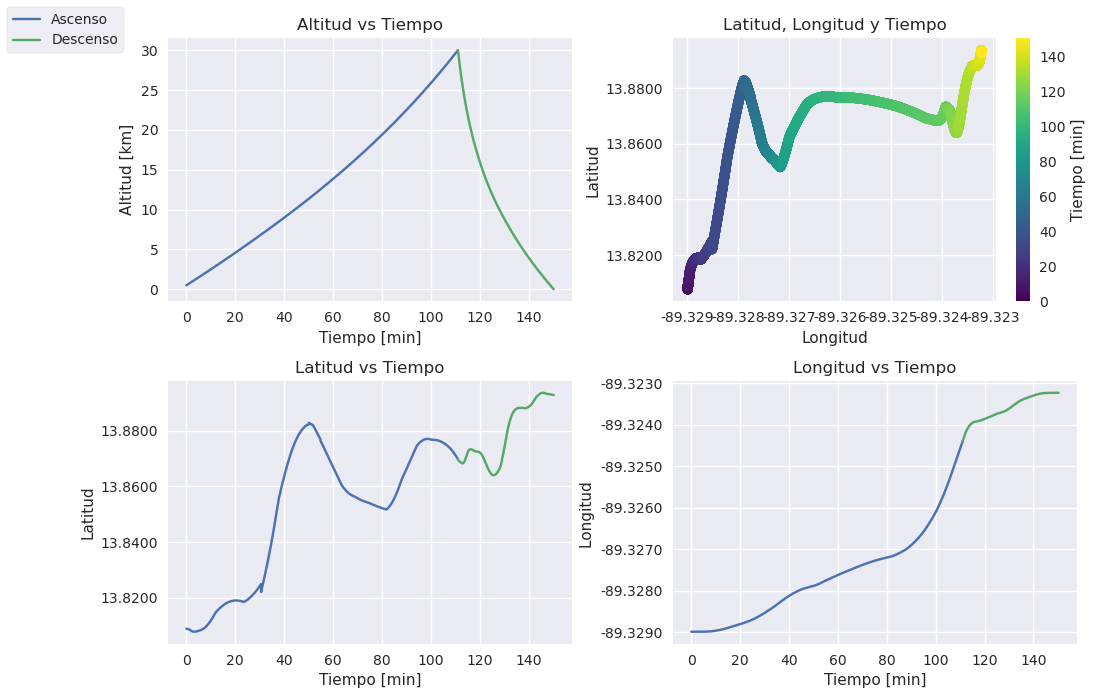

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))

# Elegir un mapa de colores adecuado
cmap = plt.cm.get_cmap('viridis')

# Grafica 1 
ax1.plot(ascenso.tiempo/60, ascenso.altitud/1000)
ax1.plot(descenso.tiempo/60, descenso.altitud/1000)
ax1.set_xlabel('Tiempo [min]')
ax1.set_ylabel('Altitud [km]')
ax1.set_title('Altitud vs Tiempo')

# Grafica 2
scatter = ax2.scatter(pd.concat([ascenso.longitude, descenso.longitude]), 
                      pd.concat([ascenso.latitude, descenso.latitude]), 
                      c=pd.concat([ascenso.tiempo/60, descenso.tiempo/60]), cmap=cmap)
ax2.set_xlabel('Longitud')
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax2.set_ylabel('Latitud')
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
ax2.set_title('Latitud, Longitud y Tiempo')
cbar = plt.colorbar(scatter, ax=ax2, label='Tiempo [min]')

# Grafica 3
ax3.plot(ascenso.tiempo/60, ascenso.latitude)
ax3.plot(descenso.tiempo/60, descenso.latitude)
ax3.set_xlabel('Tiempo [min]')
ax3.set_ylabel('Latitud')
ax3.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
ax3.set_title('Latitud vs Tiempo')

# Grafica 4
ax4.plot(ascenso.tiempo/60, ascenso.longitude)
ax4.plot(descenso.tiempo/60, descenso.longitude)
ax4.set_xlabel('Tiempo [min]')
ax4.set_ylabel('Longitud ')
ax4.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
ax4.set_title('Longitud vs Tiempo')

# plt.suptitle("Variables de la posicion en el plano en función Tiempo")
plt.tight_layout()
fig.legend(['Ascenso', 'Descenso'], loc='upper left', frameon=True)
plt.subplots_adjust(left=0.15)

plt.savefig(
    '/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/03_plano_posicion_vs_tiempo.png', dpi=300)
plt.show()


In [13]:
# Crear el objeto de mapa de Folium
mapa = folium.Map(location=[ascenso.latitude[0], ascenso.longitude[0]], zoom_start=12, tiles="Stamen Terrain")


# Iterar sobre cada fila del DataFrame
coordenadas_a = []  # Lista para almacenar las  ascenso
coordenadas_d = []  # Lista para almacenar las  descenso
for index, row in ascenso.iterrows():
    if index % 100 == 0:  # Verifica si el índice es divisible 
        latitude = row['latitude']
        longitude = row['longitude']

        coordenadas_a.append((latitude, longitude))  # Agregar la coordenada a la lista

        # # Agregar el marcador al mapa
        linea = folium.PolyLine(coordenadas_a, color='gray', weight=3, opacity=0.7)
        mapa.add_child(linea)

for index, row in descenso.iterrows():
    if index % 100 == 0:  # Verifica si el índice es divisible 
        latitude = row['latitude']
        longitude = row['longitude']

        coordenadas_d.append((latitude, longitude))  # Agregar la coordenada a la lista
        
        # # Agregar el marcador al mapa
        linea = folium.PolyLine(coordenadas_d, color='green', weight=3, opacity=0.7)
        mapa.add_child(linea)

folium.Marker(
    location=[ascenso.latitude[0], ascenso.longitude[0]],
    popup="Mt. Hood Meadows",
    icon=folium.Icon(color="gray", icon="info-sign"),
).add_to(mapa)

folium.Marker(
    location=[descenso.latitude[0], descenso.longitude[0]],
    popup="Some Other Location",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(mapa)

folium.Marker(
    location=[descenso.latitude.tail(1).values[0], descenso.longitude.tail(1).values[0]],
    popup="Some Other Location",
    icon=folium.Icon(color="green", icon="info-sign"),
).add_to(mapa)

# Visualizar el mapa
mapa.save('/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/mapa.html')
mapa


In [14]:
# Crear la figura 3D
fig = go.Figure(data=go.Scatter3d(
    x=pd.concat([ascenso.longitude, descenso.longitude]),
    y=pd.concat([ascenso.latitude, descenso.latitude]),
    z=pd.concat([ascenso.altitud, descenso.altitud]),
    mode='markers',
    marker=dict(size=4, showscale=True, color=pd.concat([ascenso.tiempo/60, descenso.tiempo/60]), colorscale='Viridis',
                colorbar=dict(title='Tiempo [min]')),
    line=dict(color='darkblue', width=2),
))

# Configurar etiquetas de los ejes y el título
fig.update_layout(
    # Nombre de los Ejes
    scene=dict(
        xaxis_title='Longitud [DD]',
        yaxis_title='Latitud [DD]',
        zaxis_title='Altitud [km]',
    ),
)

# Mostrar la figura interactiva
plt.tight_layout()
fig.show()

<Figure size 800x550 with 0 Axes>

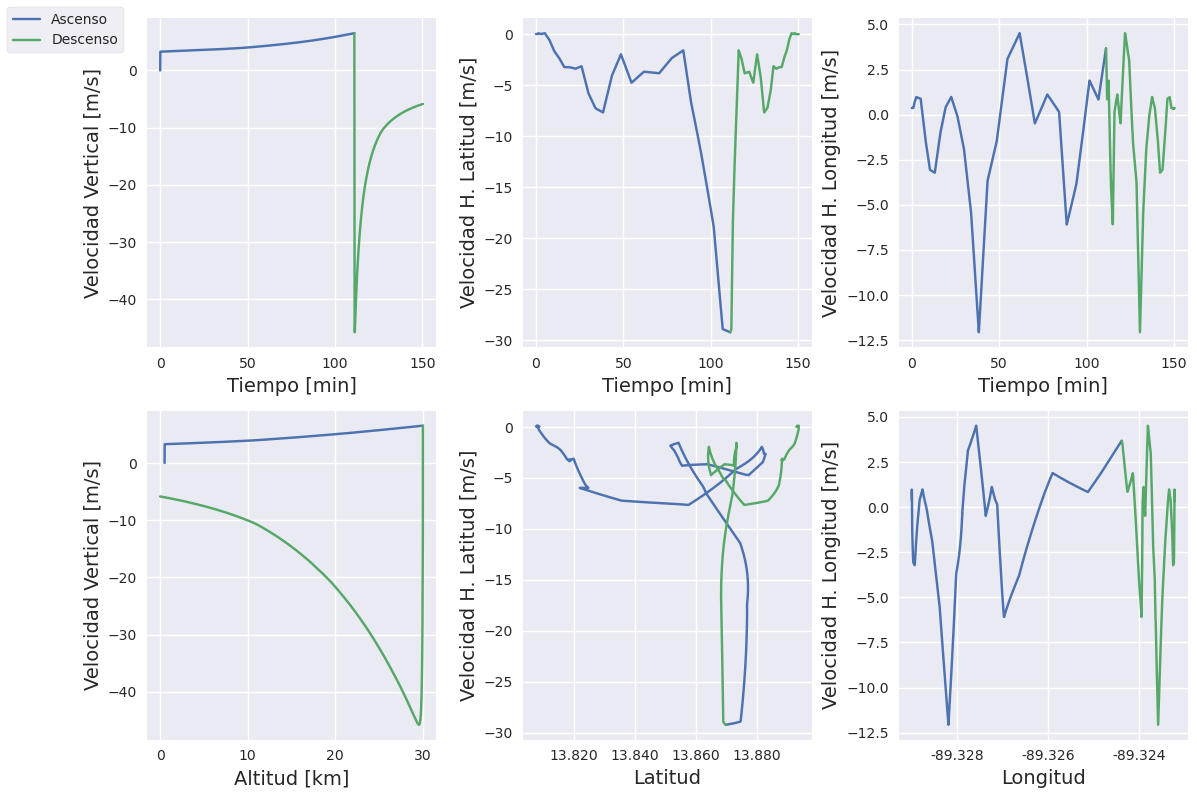

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Gráfica 1
axs[0, 0].plot(ascenso.tiempo/60, ascenso.s_vertical)
axs[0, 0].plot(descenso.tiempo/60, descenso.s_vertical)
axs[0, 0].set_xlabel('Tiempo [min]', fontsize=14)
axs[0, 0].set_ylabel('Velocidad Vertical [m/s]', fontsize=14)

# Gráfica 2
axs[0, 1].plot(ascenso.tiempo/60, ascenso.viento_u)
axs[0, 1].plot(descenso.tiempo/60, descenso.viento_u)
axs[0, 1].set_xlabel('Tiempo [min]', fontsize=14)
axs[0, 1].set_ylabel('Velocidad H. Latitud [m/s]', fontsize=14)

# Gráfica 3
axs[0, 2].plot(ascenso.tiempo/60, ascenso.viento_v)
axs[0, 2].plot(descenso.tiempo/60, descenso.viento_v)
axs[0, 2].set_xlabel('Tiempo [min]', fontsize=14)
axs[0, 2].set_ylabel('Velocidad H. Longitud [m/s]', fontsize=14)

# Gráfica 4
axs[1, 0].plot(ascenso.altitud/1000, ascenso.s_vertical)
axs[1, 0].plot(descenso.altitud/1000, descenso.s_vertical)
axs[1, 0].set_xlabel('Altitud [km]', fontsize=14)
axs[1, 0].set_ylabel('Velocidad Vertical [m/s]', fontsize=14)

# Gráfica 5
axs[1, 1].plot(ascenso.latitude, ascenso.viento_u)
axs[1, 1].plot(descenso.latitude, descenso.viento_u)
axs[1, 1].set_xlabel('Latitud', fontsize=14)
axs[1, 1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
axs[1, 1].set_ylabel('Velocidad H. Latitud [m/s]', fontsize=14)

# Gráfica 6
axs[1, 2].plot(ascenso.longitude, ascenso.viento_v)
axs[1, 2].plot(descenso.longitude, descenso.viento_v)
axs[1, 2].set_xlabel('Longitud', fontsize=14)
axs[1, 2].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
axs[1, 2].set_ylabel('Velocidad H. Longitud [m/s]', fontsize=14)

# plt.suptitle("Variables atmoféricas en función del Tiempo")
plt.tight_layout()
fig.legend(['Ascenso', 'Descenso'], loc='upper left', frameon=True)
plt.subplots_adjust(left=0.12)


plt.savefig('/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/03_graficas_tiempo_altitud_vs_velocidad.png', dpi=300)
plt.show()


## Geometria vs (Posición y tiempo)

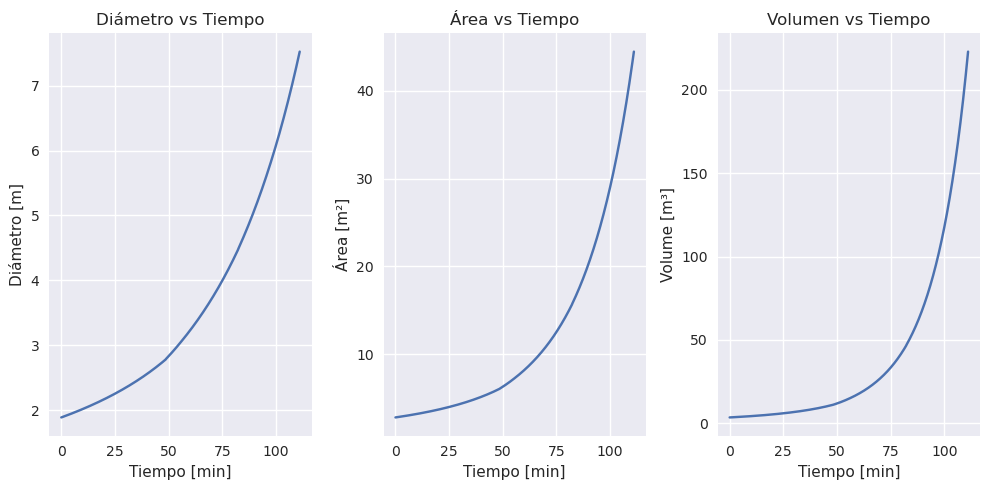

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Grafica 1
ax1.plot(ascenso.tiempo/60, ascenso.diameter_balloon)
ax1.set_xlabel('Tiempo [min]')
ax1.set_ylabel('Diámetro [m]')
ax1.set_title('Diámetro vs Tiempo')

# Grafica 2 
ax2.plot(ascenso.tiempo/60, np.pi * np.power(ascenso.diameter_balloon/2, 2))
ax2.set_xlabel('Tiempo [min]')
ax2.set_ylabel('Área [m²]')
ax2.set_title('Área vs Tiempo')

# Grafica 3 
ax3.plot(ascenso.tiempo/60, (4/3)* np.pi * np.power(ascenso.diameter_balloon/2, 3))
ax3.set_xlabel('Tiempo [min]')
ax3.set_ylabel('Volume [m³]')
ax3.set_title('Volumen vs Tiempo')

# plt.suptitle("Todas las variables en función del Tiempo")
plt.tight_layout()

plt.savefig('/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/03_geometria_vs_tiempo.png', dpi=300)
plt.show()

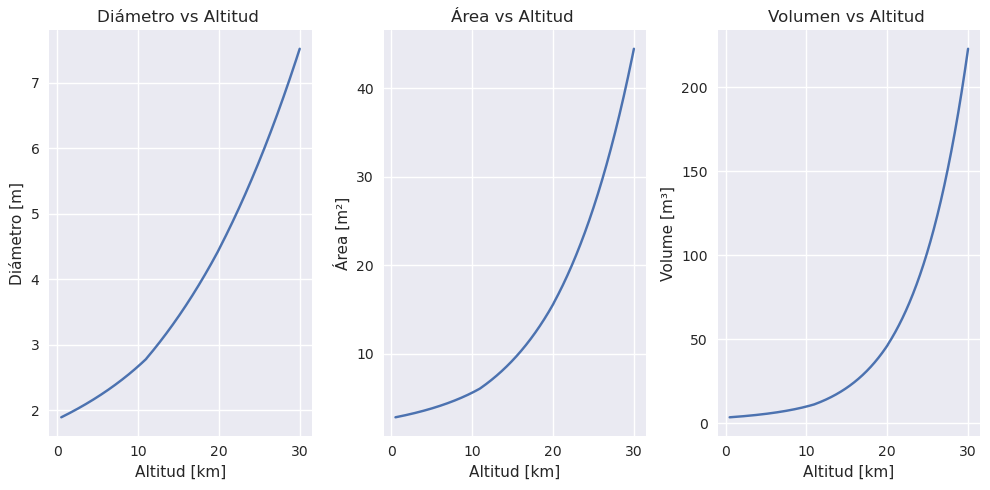

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Grafica 1
ax1.plot(ascenso.altitud/1000, ascenso.diameter_balloon)
ax1.set_xlabel('Altitud [km]')
ax1.set_ylabel('Diámetro [m]')
ax1.set_title('Diámetro vs Altitud ')

# Grafica 2 
ax2.plot(ascenso.altitud/1000, np.pi * np.power(ascenso.diameter_balloon/2, 2))
ax2.set_xlabel('Altitud [km]')
ax2.set_ylabel('Área [m²]')
ax2.set_title('Área vs Altitud ')

# Grafica 3 
ax3.plot(ascenso.altitud/1000, (4/3)* np.pi * np.power(ascenso.diameter_balloon/2, 3))
ax3.set_xlabel('Altitud [km]')
ax3.set_ylabel('Volume [m³]')
ax3.set_title('Volumen vs Altitud ')

# plt.suptitle("Todas las variables en función de la Altitud")
plt.tight_layout()

plt.savefig('/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/03_geometria_vs_altitud.png', dpi=300)
plt.show()

Ahroa con las variables que afectan al tamaño del diametro

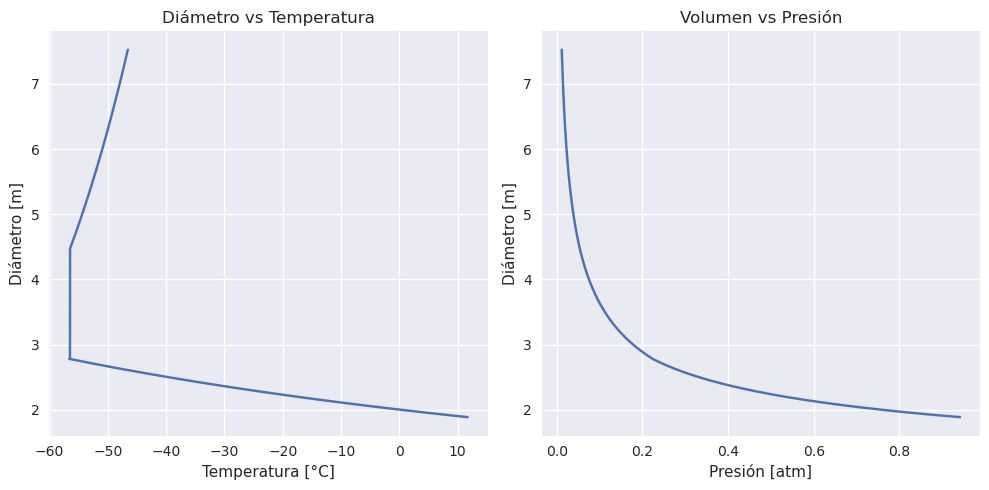

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Grafica 1
ax1.plot(ascenso.temperatura-273.15, ascenso.diameter_balloon)
ax1.set_xlabel('Temperatura [°C]')
ax1.set_ylabel('Diámetro [m]')
ax1.set_title('Diámetro vs Temperatura')

# Grafica 2 
ax2.plot(ascenso.presion/101325.0, ascenso.diameter_balloon)
ax2.set_xlabel('Presión [atm]')
ax2.set_ylabel('Diámetro [m]')
ax2.set_title('Volumen vs Presión')

# plt.suptitle("Diametro en función de las variables atomsféricas")
plt.tight_layout()

plt.savefig('/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/03_geometria_vs_atmosfera.png', dpi=300)
plt.show()

## Atmosféricas vs (Posición y tiempo)

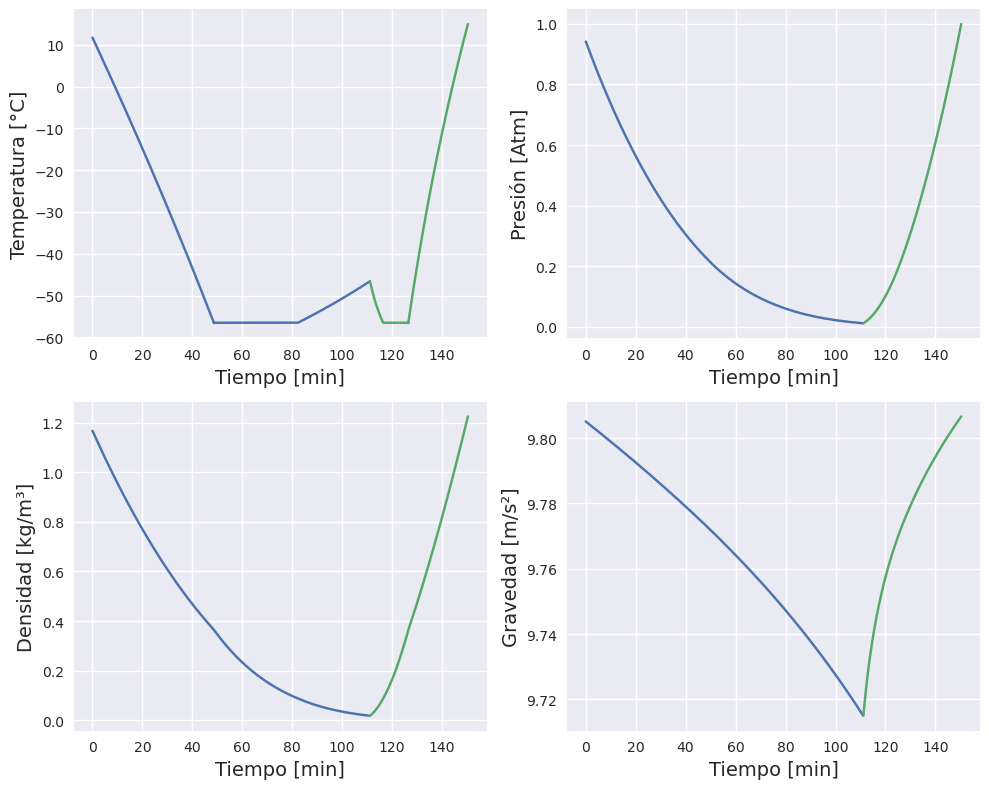

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfica 1
axs[0, 0].plot(ascenso.tiempo/60, ascenso.temperatura-273.15)
axs[0, 0].plot(descenso.tiempo/60, descenso.temperatura-273.15)
axs[0, 0].set_xlabel('Tiempo [min]', fontsize=14)
axs[0, 0].set_ylabel('Temperatura [°C]', fontsize=14)

# Gráfica 2
axs[0, 1].plot(ascenso.tiempo/60, ascenso.presion/101325.0)
axs[0, 1].plot(descenso.tiempo/60, descenso.presion/101325.0)
axs[0, 1].set_xlabel('Tiempo [min]', fontsize=14)
axs[0, 1].set_ylabel('Presión [Atm]', fontsize=14)

# Gráfica 3
axs[1, 0].plot(ascenso.tiempo/60, ascenso.densidad)
axs[1, 0].plot(descenso.tiempo/60, descenso.densidad)
axs[1, 0].set_xlabel('Tiempo [min]', fontsize=14)
axs[1, 0].set_ylabel('Densidad [kg/m³]', fontsize=14)

# Gráfica 4
axs[1, 1].plot(ascenso.tiempo/60, ascenso.gravedad)
axs[1, 1].plot(descenso.tiempo/60, descenso.gravedad)
axs[1, 1].set_xlabel('Tiempo [min]', fontsize=14)
axs[1, 1].set_ylabel('Gravedad [m/s²]', fontsize=14)

# plt.suptitle("Variables atmoféricas en función del Tiempo")
plt.tight_layout()


plt.savefig('/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/03_atmsferica_vs_tiempo.png', dpi=300)
plt.show()


# Viento anomalia

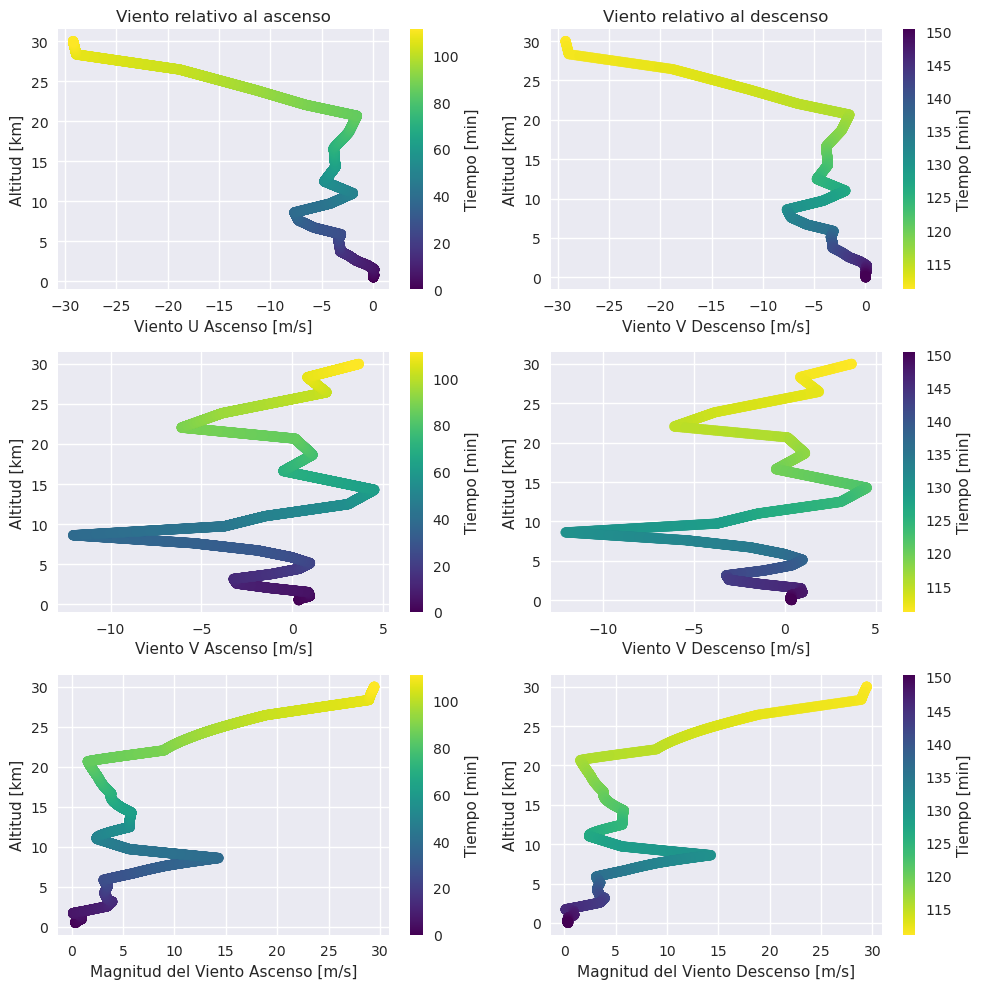

In [23]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# Elegir un mapa de colores adecuado
cmap = plt.cm.get_cmap('viridis')

# Grafica 1 
scatter = ax1.scatter(ascenso.viento_u, ascenso.altitud/1000,
                      c= ascenso.tiempo/60, cmap=cmap)
ax1.set_xlabel('Viento U Ascenso [m/s]')
ax1.set_ylabel('Altitud [km]')
ax1.set_title('Viento relativo al ascenso')
cbar = plt.colorbar(scatter, ax=ax1, label='Tiempo [min]')

# Grafica 2
scatter = ax2.scatter(descenso.viento_u, descenso.altitud/1000,
                      c= descenso.tiempo/60, cmap=cmap.reversed())
ax2.set_xlabel('Viento V Descenso [m/s]')
ax2.set_ylabel('Altitud [km]')
ax2.set_title('Viento relativo al descenso')
cbar = plt.colorbar(scatter, ax=ax2, label='Tiempo [min]')

# Grafica 3 
scatter = ax3.scatter(ascenso.viento_v, ascenso.altitud/1000,
                      c= ascenso.tiempo/60, cmap=cmap)
ax3.set_xlabel('Viento V Ascenso [m/s]')
ax3.set_ylabel('Altitud [km]')
cbar = plt.colorbar(scatter, ax=ax3, label='Tiempo [min]')

# Grafica 4
scatter = ax4.scatter(descenso.viento_v, descenso.altitud/1000,
                      c= descenso.tiempo/60, cmap=cmap.reversed())
ax4.set_xlabel('Viento V Descenso [m/s]')
ax4.set_ylabel('Altitud [km]')
cbar = plt.colorbar(scatter, ax=ax4, label='Tiempo [min]')

# Grafica 5 
scatter = ax5.scatter(np.sqrt(ascenso.viento_u**2 + ascenso.viento_v**2), ascenso.altitud/1000,
                      c= ascenso.tiempo/60, cmap=cmap)
ax5.set_xlabel('Magnitud del Viento Ascenso [m/s]')
ax5.set_ylabel('Altitud [km]')
cbar = plt.colorbar(scatter, ax=ax5, label='Tiempo [min]')

# Grafica 6
scatter = ax6.scatter(np.sqrt(descenso.viento_u**2 + descenso.viento_v**2), descenso.altitud/1000,
                      c= descenso.tiempo/60, cmap=cmap.reversed())
ax6.set_xlabel('Magnitud del Viento Descenso [m/s]')
ax6.set_ylabel('Altitud [km]')
# ax2.set_title('Latitud, Longitud y Tiempo')
cbar = plt.colorbar(scatter, ax=ax6, label='Tiempo [min]')

# plt.suptitle("Variables de la posicion en el plano en función Tiempo")
plt.tight_layout()

plt.savefig(
    '/home/osmin-ubuntu/proyecto_stratoballoon/document/figures/03_vientos.png', dpi=300)
plt.show()
